In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils import *
from model import *
from optimizers import *
from RFF import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load and preprocess data
data = pd.read_csv('toydata_tiny.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameters to test
learning_rates = [0.001, 0.01, 0.1]
lambdas = [0.01, 0.05, 0.1]
epochs = 30
batch_size = 10

optimizer = MiniBatchSGD()
model = LinearSVM()

# Perform cross-validation
best_params, best_accuracy, all_results = cross_validate_svm(X_scaled, y, model, optimizer, lambdas, learning_rates, epochs, batch_size)

print(f"Best Learning Rate: {best_params[0]}, Best Lambda: {best_params[1]}")
print(f"Best Accuracy: {best_accuracy}")

Training Progress: 100%|██████████| 30/30 [00:00<00:00, 484.76it/s, loss=0.0778]

Best Learning Rate: 0.001, Best Lambda: 0.01
Best Accuracy: 0.9949999999999999


In [25]:
optimizer = MiniBatchSGD(learning_rate=best_params[0])
model = LinearSVM(lambda_=best_params[1])

Training Progress: 100%|██████████| 30/30 [00:00<00:00, 565.98it/s, loss=0.0607]


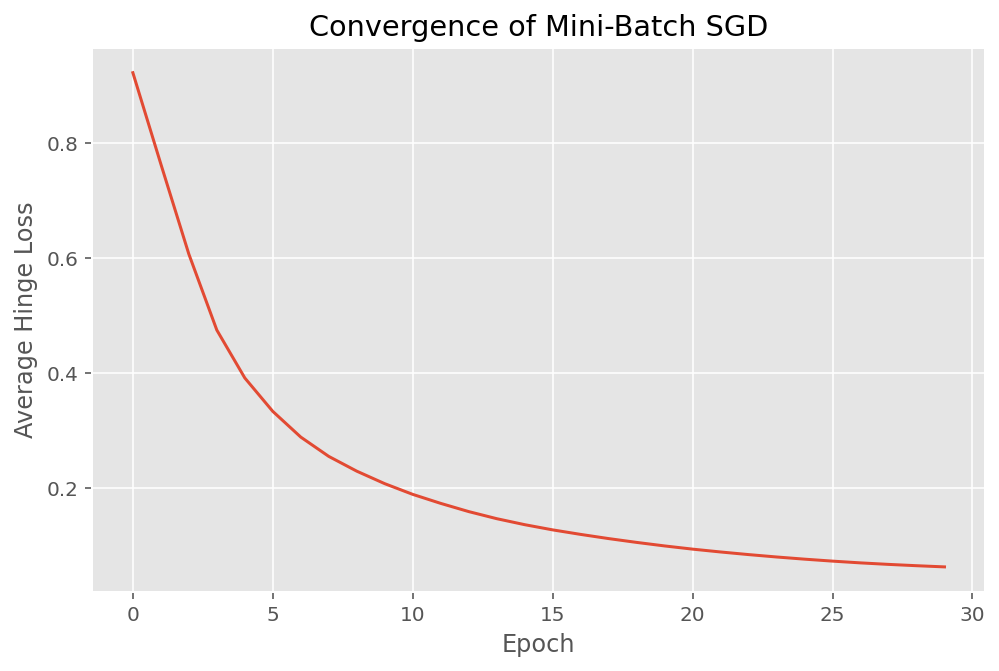

Average 5-fold cross-validation accuracy: 0.99


In [26]:
average_accuracy, all_loss_histories = cross_val_score(X_scaled, y, model, optimizer, epochs, batch_size)

# Plotting average convergence across folds
average_loss_history = np.mean(all_loss_histories, axis=0)
plt.plot(average_loss_history)
plt.title('Convergence of Mini-Batch SGD')
plt.xlabel('Epoch')
plt.ylabel('Average Hinge Loss')
plt.show()

print(f"Average 5-fold cross-validation accuracy: {average_accuracy:.2f}")

In [22]:
# Load and preprocess data
data = pd.read_csv('toydata_large.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameters to test
learning_rates = [0.001, 0.01, 0.1]
lambdas = [0.01, 0.05, 0.1]
epochs = 30
batch_size = 10

optimizer = MiniBatchSGD()
model = LinearSVM()

# Perform cross-validation
best_params, best_accuracy, all_results = cross_validate_svm(X_scaled, y, model, optimizer, lambdas, learning_rates, epochs, batch_size)

print(f"Best Learning Rate: {best_params[0]}, Best Lambda: {best_params[1]}")
print(f"Best Accuracy: {best_accuracy}")

Training Progress: 100%|██████████| 30/30 [00:22<00:00,  1.35it/s, loss=0.00604]

Best Learning Rate: 0.001, Best Lambda: 0.01
Best Accuracy: 1.0


Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 30/30 [00:21<00:00,  1.41it/s, loss=0.000939]


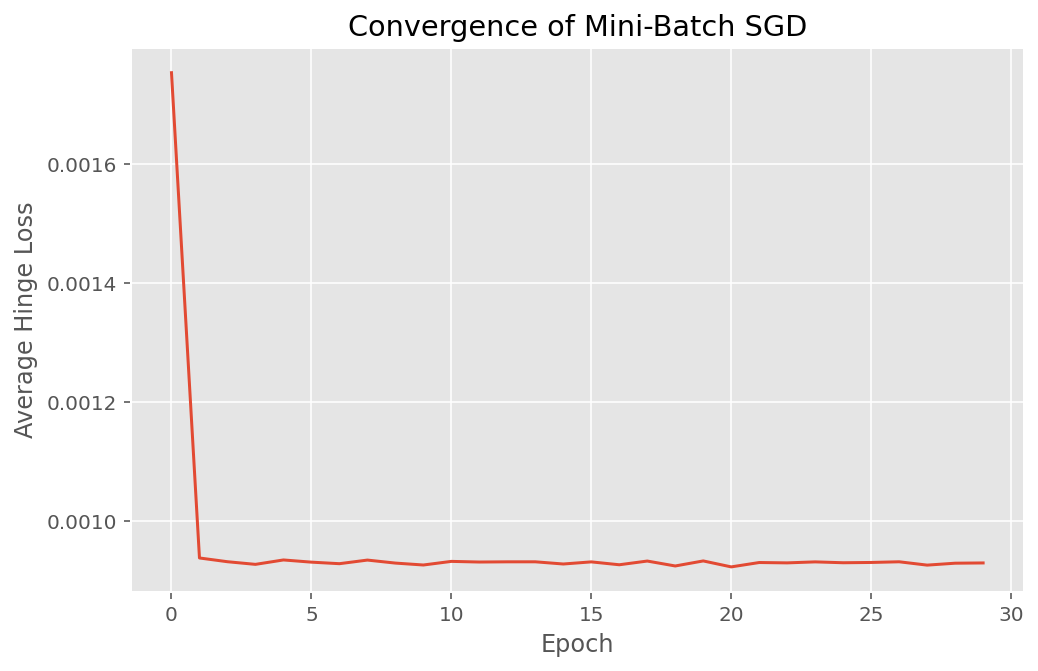

Average 5-fold cross-validation accuracy: 1.00


In [23]:
optimizer = MiniBatchSGD(learning_rate=best_params[0])
model = LinearSVM(lambda_=best_params[1])

average_accuracy, all_loss_histories = cross_val_score(X_scaled, y, model, optimizer, epochs, batch_size)

# Plotting average convergence across folds
average_loss_history = np.mean(all_loss_histories, axis=0)
plt.plot(average_loss_history)
plt.title('Convergence of Mini-Batch SGD')
plt.xlabel('Epoch')
plt.ylabel('Average Hinge Loss')
plt.show()

print(f"Average 5-fold cross-validation accuracy: {average_accuracy:.2f}")

In [3]:
# Load and preprocess data
data = np.load('imdb.npz', allow_pickle=True)

In [4]:
X_train = data['train']
y_train = data['train_labels']
X_test = data['test']
y_test = data ['test_labels']

In [5]:
X_train = X_train.item().todense()
X_test = X_test.item().todense()

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

In [8]:
model = LinearSVM(lambda_=0.01)
optimizer = MiniBatchSGD(learning_rate=0.001)

In [9]:
model.fit(X_train_scaled, y_train, optimizer, epochs=30)

Training Progress: 100%|██████████| 30/30 [41:30<00:00, 83.02s/it, loss=[0.49219568]]


[array([0.70869646]),
 array([0.54104369]),
 array([0.50338165]),
 array([0.49225153]),
 array([0.50037772]),
 array([0.49259575]),
 array([0.49191421]),
 array([0.49017161]),
 array([0.48760592]),
 array([0.49674157]),
 array([0.49210326]),
 array([0.48631813]),
 array([0.48958713]),
 array([0.49421188]),
 array([0.48565591]),
 array([0.4938707]),
 array([0.4893459]),
 array([0.50017926]),
 array([0.49188596]),
 array([0.49943404]),
 array([0.50312282]),
 array([0.49672459]),
 array([0.49484629]),
 array([0.48934957]),
 array([0.50245253]),
 array([0.48719655]),
 array([0.50230186]),
 array([0.48859496]),
 array([0.48640589]),
 array([0.49219568])]

In [11]:
y_pred = model.predict(X_test_scaled)

In [12]:
accuracy_score(y_test, y_pred)

0.8602

In [ ]:
# Parameters to test
learning_rates = [0.001, 0.01, 0.1]
lambdas = [0.01, 0.05, 0.1]
epochs = 30
batch_size = 10

# Perform cross-validation
best_params, best_accuracy, all_results = cross_validate_svm(X_scaled, y, lambdas, learning_rates, epochs, batch_size)

print(f"Best Learning Rate: {best_params[0]}, Best Lambda: {best_params[1]}")
print(f"Best Accuracy: {best_accuracy}")

In [5]:
# Load and preprocess data
data = pd.read_csv('toydata_tiny.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

optimizer = Adagrad()
model = LinearSVM()

model.fit(X_scaled, y, optimizer, epochs=30, batch_size=10)

Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]

yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [90]:
# Load and preprocess data
data = pd.read_csv('toydata_tiny.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameters to test
learning_rates = [0.001, 0.01, 0.1]
lambdas = [0.01, 0.05, 0.1]
epochs = 30
batch_size = 10

optimizer = Adagrad()
model = LinearSVM()

# Perform cross-validation
best_params, best_accuracy, all_results = cross_validate_svm(X_scaled, y, model, optimizer, lambdas, learning_rates, epochs, batch_size)

print(f"Best Learning Rate: {best_params[0]}, Best Lambda: {best_params[1]}")
print(f"Best Accuracy: {best_accuracy}")

Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]

yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)
yi ()
xi (2,)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [59]:
class RandomFourierFeatures:

    def __init__(self, n_components=100, gamma=1.0):
        self.n_components = n_components
        self.gamma = gamma
        self.weights = None 
        self.bias = None

    def fit(self, X):
        d = X.shape[1]
        self.weights = np.random.normal(0, np.sqrt(2 * self.gamma), size=(d, self.n_components))
        self.bias = np.random.uniform(0, 2 * np.pi, size=self.n_components)

    def transform(self, X):
        projection = np.dot(X, self.weights) + self.bias
        return np.cos(projection) * np.sqrt(2. / self.n_components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [60]:
# Load and preprocess data
data = pd.read_csv('toydata_tiny.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# Generate Random Fourier Features
rff = RandomFourierFeatures(n_components=300, gamma=0.1)
X_scaled_rff = rff.fit_transform(X_scaled)

In [62]:
# Parameters to test
learning_rates = [0.001, 0.01, 0.1]
lambdas = [0.01, 0.05, 0.1]
epochs = 30
batch_size = 10

optimizer = MiniBatchSGD()
model = LinearSVM()

# Perform cross-validation
best_params, best_accuracy, all_results = cross_validate_svm(X_scaled_rff, y, model, optimizer, lambdas, learning_rates, epochs, batch_size)

print(f"Best Learning Rate: {best_params[0]}, Best Lambda: {best_params[1]}")
print(f"Best Accuracy: {best_accuracy}")

Training Progress: 100%|██████████| 30/30 [00:00<00:00, 410.28it/s, loss=0.389]

Best Learning Rate: 0.01, Best Lambda: 0.01
Best Accuracy: 0.9949999999999999


Training Progress: 100%|██████████| 30/30 [00:00<00:00, 345.24it/s, loss=0.376]


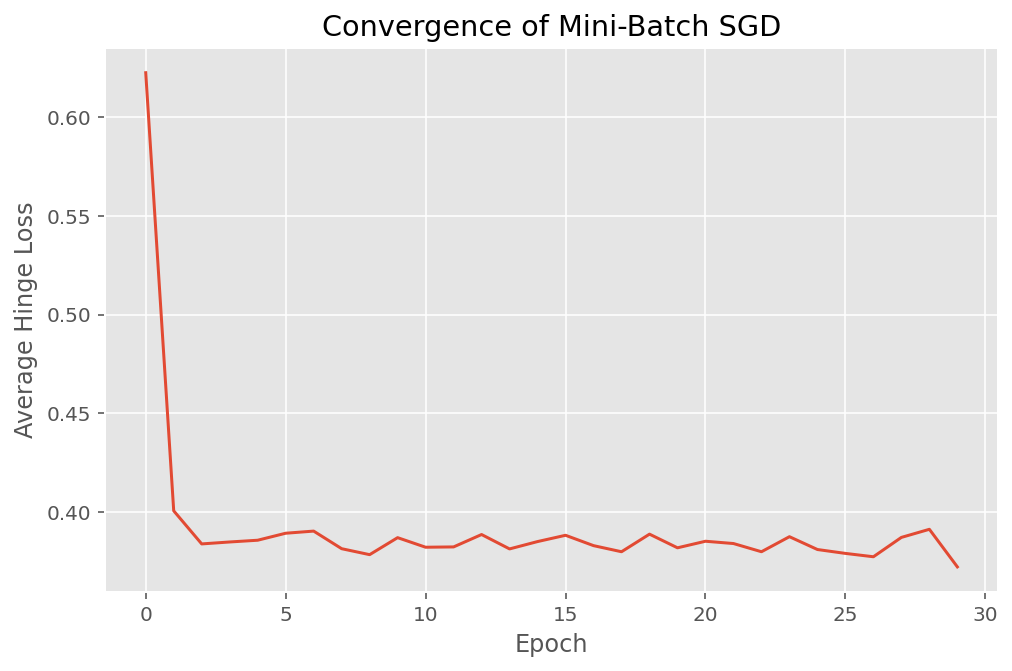

Average 5-fold cross-validation accuracy: 0.93


In [63]:
average_accuracy, all_loss_histories = cross_val_score(X_scaled_rff, y, model, optimizer, epochs, batch_size)

# Plotting average convergence across folds
average_loss_history = np.mean(all_loss_histories, axis=0)
plt.plot(average_loss_history)
plt.title('Convergence of Mini-Batch SGD')
plt.xlabel('Epoch')
plt.ylabel('Average Hinge Loss')
plt.show()

print(f"Average 5-fold cross-validation accuracy: {average_accuracy:.2f}")

In [45]:
# Load and preprocess data
data = pd.read_csv('toydata_large.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Generate Random Fourier Features
rff = RandomFourierFeatures(n_components=100, gamma=0.1)
X_scaled_rff = rff.fit_transform(X_scaled)

In [47]:
# Parameters to test
learning_rates = [0.001, 0.01, 0.1]
lambdas = [0.01, 0.05, 0.1]
epochs = 30
batch_size = 10

optimizer = MiniBatchSGD()
model = LinearSVM()

# Perform cross-validation
best_params, best_accuracy, all_results = cross_validate_svm(X_scaled_rff, y, model, optimizer, lambdas, learning_rates, epochs, batch_size)

print(f"Best Learning Rate: {best_params[0]}, Best Lambda: {best_params[1]}")
print(f"Best Accuracy: {best_accuracy}")

Training Progress: 100%|██████████| 30/30 [00:29<00:00,  1.03it/s, loss=0.028] 

Best Learning Rate: 0.001, Best Lambda: 0.01
Best Accuracy: 1.0


Training Progress: 100%|██████████| 30/30 [00:28<00:00,  1.04it/s, loss=0.0281]


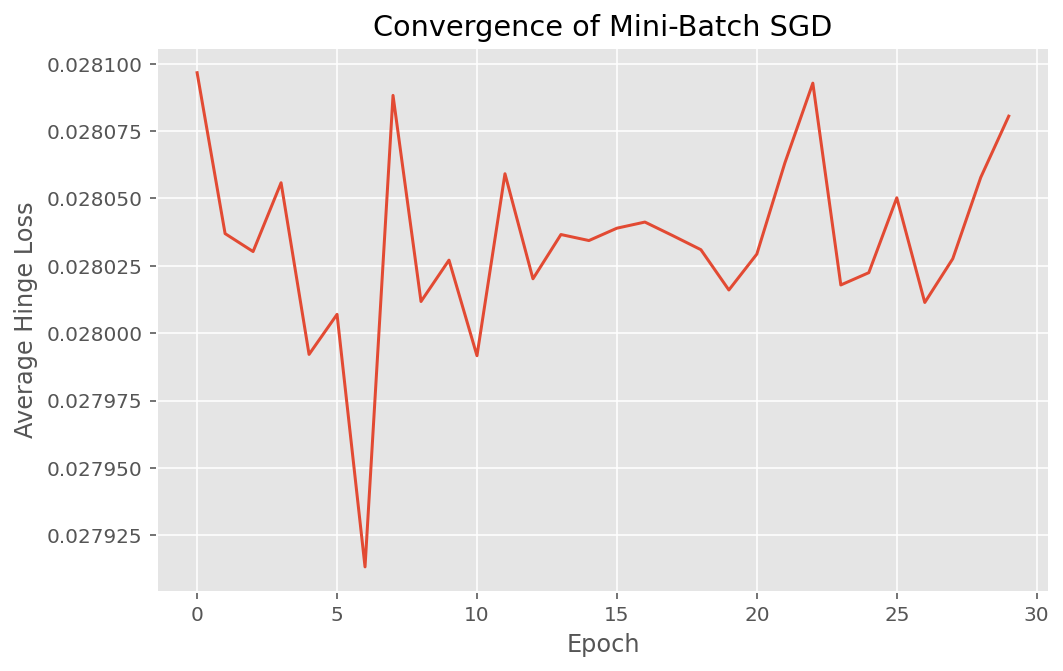

Average 5-fold cross-validation accuracy: 1.00


In [48]:
average_accuracy, all_loss_histories = cross_val_score(X_scaled_rff, y, model, optimizer, epochs, batch_size)

# Plotting average convergence across folds
average_loss_history = np.mean(all_loss_histories, axis=0)
plt.plot(average_loss_history)
plt.title('Convergence of Mini-Batch SGD')
plt.xlabel('Epoch')
plt.ylabel('Average Hinge Loss')
plt.show()

print(f"Average 5-fold cross-validation accuracy: {average_accuracy:.2f}")

In [83]:
data = np.load('imdb.npz', allow_pickle=True)

X_train = data['train']
y_train = data['train_labels']
X_test = data['test']
y_test = data ['test_labels']

X_train = X_train.item().todense()
X_test = X_test.item().todense()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

model = LinearSVM(lambda_=0.01)
optimizer = MiniBatchSGD(learning_rate=0.001)

In [84]:
rff = RandomFourierFeatures(n_components=10000, gamma=0.1)
X_train_scaled_rff = rff.fit_transform(X_train_scaled)
X_test_scaled_rff = rff.transform(X_test_scaled)

In [85]:
loss_history = model.fit(X_train_scaled_rff, y_train, optimizer, epochs=30)

Training Progress: 100%|██████████| 30/30 [42:18<00:00, 84.62s/it, loss=0.998]


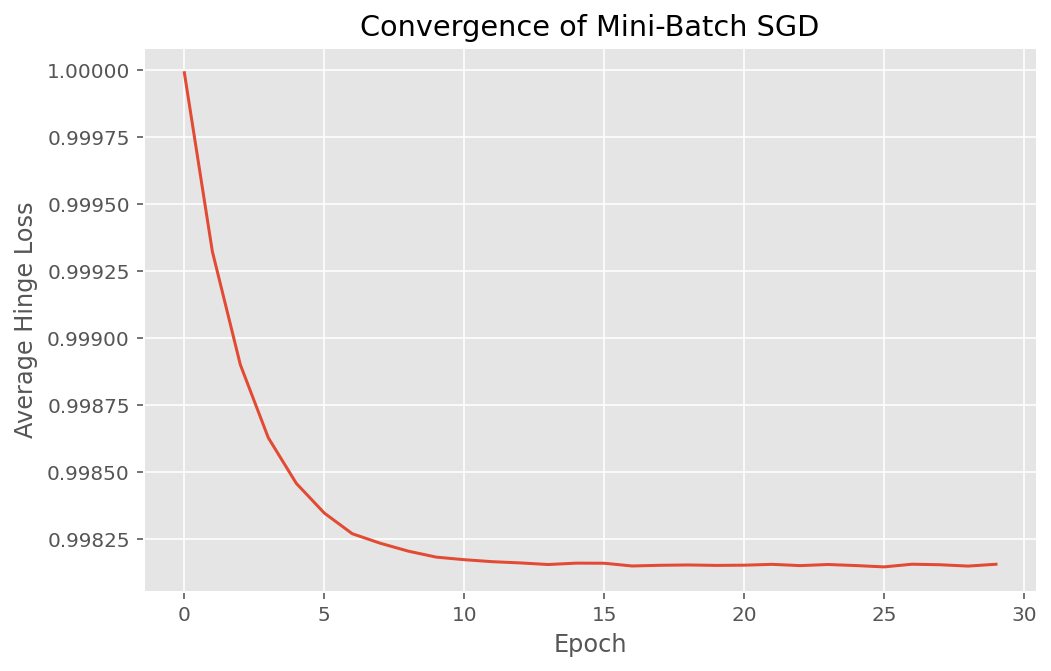

In [86]:
plt.plot(loss_history)
plt.title('Convergence of Mini-Batch SGD')
plt.xlabel('Epoch')
plt.ylabel('Average Hinge Loss')
plt.show()

In [87]:
y_pred = model.predict(X_test_scaled_rff)
print(accuracy_score(y_test, y_pred))

0.5174
